In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the dataset
df=pd.read_csv('movie_metadata.csv')

In [3]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
df.shape

(5043, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

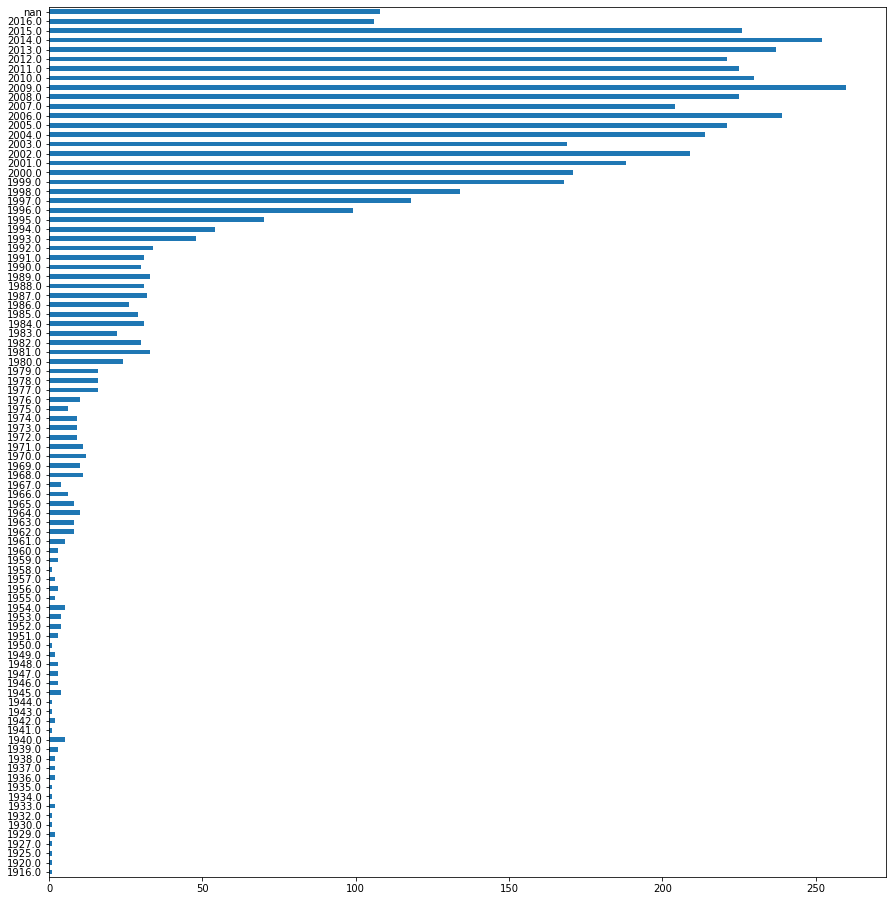

In [6]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
df.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [7]:
# features used in  recommendation
df=df.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [8]:
df.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [9]:
df.isnull().sum()[df.isnull().sum()>1]

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
dtype: int64

In [10]:
df['director_name']=df['director_name'].replace(np.nan,'unknown')
df['actor_1_name'] =df['actor_1_name'].replace(np.nan,'unknown')
df['actor_2_name'] =df['actor_2_name'].replace(np.nan,'unknown')
df['actor_3_name'] =df['actor_3_name'].replace(np.nan,'unknown')

In [11]:
df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [12]:
df['genres']=df['genres'].str.replace('|',' ')

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/442032424.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['genres']=df['genres'].str.replace('|',' ')


In [13]:
df['movie_title']=df['movie_title'].str.lower()

In [14]:
df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...


In [15]:
df['movie_title'][0]

'avatar\xa0'

In [16]:
# removing the null terminating char at the end
df['movie_title'] = df['movie_title'].apply(lambda x : x[:-1])

In [17]:
df['movie_title'][3]

'the dark knight rises'

In [18]:
df.to_csv('dataset.csv',index=False)

In [19]:
credits = pd.read_csv('credits.csv')

In [20]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [21]:
meta = pd.read_csv('movies_metadata.csv')

C:\Users\Sagar\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [23]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')

In [24]:
meta['release_date'].value_counts()

2008-01-01    136
2009-01-01    121
2007-01-01    118
2005-01-01    111
2006-01-01    101
             ... 
1957-09-26      1
1938-11-21      1
1936-08-19      1
2010-01-27      1
1917-10-21      1
Name: release_date, Length: 17333, dtype: int64

In [25]:
meta['year'] = meta['release_date'].dt.year

In [26]:
meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

In [27]:
# Getting only 2017 movies as we already have movies up to the year 2016 in preprocessing 1 file. 
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [28]:
new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [29]:
new_meta['id'] = new_meta['id'].astype(int)

In [30]:
data = pd.merge(new_meta, credits, on='id')

In [31]:
pd.set_option('display.max_colwidth',85)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name'...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe4c9cc3a368...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', 'gender': ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name'...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e68db0e0a26...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', 'gender': ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name'...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a261fb3004e...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'gender': 2, ..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 35, 'name'...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '53dd76ba0e0...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gender': 0, 'i..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': ...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e0a26569400...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', 'gender': 2..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001b0b1', 'ge...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', 'gender': 0..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, 'name': 'A...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04e925141059...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'gender': 0, ..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id': 10749, ...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gender': 0, 'i..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Th...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3a3686d9200...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gender': 2, 'i..."


In [32]:
data['genres'].dtype

dtype('O')

In [33]:
# we have to convert string into list
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [34]:
def genres_List(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [35]:
data['genres_list'] = data['genres'].map(lambda x: genres_List(x))

In [36]:
data['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [37]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [38]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [39]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [40]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [41]:
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [42]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [43]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [44]:
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [45]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [46]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))

In [47]:
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [48]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [49]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [50]:
movie.isnull().sum()[movie.isnull().sum()>1]

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
dtype: int64

In [51]:
movie = movie.dropna(how='any')

In [52]:
movie.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [53]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [54]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [55]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg Adventure ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy Sci-Fi
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adventure Fant...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comedy Sci-Fi
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Action Adventure
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Comedy
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Crime Comedy...


In [56]:
old = pd.read_csv('dataset.csv')

In [57]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [58]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thriller
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror Thriller
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [59]:
new = old.append(movie)

In [60]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Comedy
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Crime Comedy...


In [61]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [62]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Comedy
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Crime Comedy...


In [63]:
new.to_csv('new_dataset.csv',index=False)

In [64]:
# Extracting features of 2018 movies from Wikipedia
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [65]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [66]:
df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, L...",[2],NaN
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex ...,[3],NaN
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Coo...",[4],NaN
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan B...",[5],NaN
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Lia...",[6],NaN


In [67]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'd3177296e3ec2ff3877aab46d8246064'

In [68]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

In [69]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [70]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,genres
0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, L...",[2],NaN,Horror Mystery Thriller
1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex ...,[3],NaN,Thriller Drama
2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Coo...",[4],NaN,Action Thriller
3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan B...",[5],NaN,Drama History Western
4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Lia...",[6],NaN,Action Thriller Mystery
...,...,...,...,...,...,...,...,...
267,DECEMBER,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca Hall, Ral...",NaN,[164],Mystery Adventure Comedy Crime
268,DECEMBER,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Carell, Sam Ro...",NaN,[137],Thriller Science Fiction Action Adventure
269,DECEMBER,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, Armie Hamm...",NaN,[228],Drama History
270,DECEMBER,25,Destroyer,Annapurna Pictures,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole Kidman, Seb...",NaN,[260],Thriller Crime Drama Action


In [71]:
df_2018 = df[['Title','Cast and crew','genres']]

In [72]:
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, L...",Horror Mystery Thriller
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex ...,Thriller Drama
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Coo...",Action Thriller
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan B...",Drama History Western
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Lia...",Action Thriller Mystery
...,...,...,...
267,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca Hall, Ral...",Mystery Adventure Comedy Crime
268,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Carell, Sam Ro...",Thriller Science Fiction Action Adventure
269,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, Armie Hamm...",Drama History
270,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole Kidman, Seb...",Thriller Crime Drama Action


In [73]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [74]:
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/930721595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [75]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [76]:
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/2274966287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))


In [77]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [78]:
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/3672495884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


In [79]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [80]:
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/2517195254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))


In [81]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus Sampson, L...",Horror Mystery Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Lauren Wolkstein (director); Christopher Radcliff (co-director/screenplay); Alex ...,Thriller Drama,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,Stratton,"Simon West (director); Duncan Falconer, Warren Davis II (screenplay); Dominic Coo...",Action Thriller,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan
3,Sweet Country,"Warwick Thornton (director); David Tranter, Steven McGregor (screenplay); Bryan B...",Drama History Western,Warwick Thornton,Bryan Brown,Sam Neill,NaN
4,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi (screenplay); Lia...",Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
...,...,...,...,...,...,...,...
267,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca Hall, Ral...",Mystery Adventure Comedy Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
268,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Carell, Sam Ro...",Thriller Science Fiction Action Adventure,Adam McKay,Christian Bale,Amy Adams,Steve Carell
269,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, Armie Hamm...",Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux
270,Destroyer,"Karyn Kusama (director); Phil Hay, Matt Manfredi (screenplay); Nicole Kidman, Seb...",Thriller Crime Drama Action,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell


In [82]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [83]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [84]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,Insidious: The Last Key
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,Stratton
3,Warwick Thornton,Bryan Brown,Sam Neill,NaN,Drama History Western,Sweet Country
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
...,...,...,...,...,...,...
267,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,Holmes & Watson
268,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,Vice
269,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex
270,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,Destroyer


In [85]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')

In [86]:
new_df18['movie_title'] = new_df18['movie_title'].str.lower()

In [87]:
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

In [88]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thriller
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Thriller Drama
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West Action Thriller
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama History Western
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thriller Mystery
...,...,...,...,...,...,...,...
267,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Mystery Adventure Comedy Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Mystery Adventure Comedy Crime
268,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McKay Thriller Science Fiction Action ...
269,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama History
270,Karyn Kusama,Nicole Kidman,Sebastian Stan,Toby Kebbell,Thriller Crime Drama Action,destroyer,Nicole Kidman Sebastian Stan Toby Kebbell Karyn Kusama Thriller Crime Drama Action


In [89]:
# Extracting features of 2019 movies from Wikipedia
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [90]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)

In [91]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,JANUARY,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Taylor Russel...",[2]
1,JANUARY,4,Rust Creek,IFC Films,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, Jay Paulson...",[3]
2,JANUARY,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kartheiser, O...",[4]
3,JANUARY,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce Dallas Howa...,[5]
4,JANUARY,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevin Hart, Ni...",[6]
...,...,...,...,...,...,...
237,DECEMBER,25,Spies in Disguise,20th Century Fox / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Smith, Tom H...",[132]
238,DECEMBER,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florence Pugh, El...",[221]
239,DECEMBER,25,1917,Universal Pictures / DreamWorks Pictures,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); George MacKa...,[222]
240,DECEMBER,25,Just Mercy,Warner Bros. Pictures / Participant Media,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay); Michael ...",[223]


In [92]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [93]:
df_2019 = df[['Title','Cast and crew','genres']]
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Taylor Russel...",Horror Thriller Mystery
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, Jay Paulson...",Thriller Drama
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kartheiser, O...",Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce Dallas Howa...,Drama Adventure Family
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevin Hart, Ni...",Comedy Drama
...,...,...,...
237,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Smith, Tom H...",Animation Action Adventure Comedy Family
238,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florence Pugh, El...",Drama Romance
239,1917,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); George MacKa...,War Drama Action Thriller
240,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay); Michael ...",Drama Crime History


In [94]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [95]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/203239715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))


In [96]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [97]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/1562076556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))


In [98]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [99]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/3736213850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))


In [100]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [101]:
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [102]:
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [103]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [104]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')

In [105]:
new_df19['movie_title'] = new_df19['movie_title'].str.lower()

In [106]:
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']

In [107]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Mystery,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Thriller Mystery
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Thriller
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin Smith Drama...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
...,...,...,...,...,...,...,...
237,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation Action Adve..."
238,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
239,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Action Thriller
240,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Crime History


In [108]:
my_df = new_df18.append(new_df19,ignore_index=True)
my_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Mystery Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Mystery Thriller
1,Lauren Wolkstein,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Althaus Lauren Wolkstein Thriller Drama
2,Simon West,Dominic Cooper,Austin Stowell,Gemma Chan,Action Thriller,stratton,Dominic Cooper Austin Stowell Gemma Chan Simon West Action Thriller
3,Warwick Thornton,Bryan Brown,Sam Neill,unknown,Drama History Western,sweet country,Bryan Brown Sam Neill unknown Warwick Thornton Drama History Western
4,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thriller Mystery
...,...,...,...,...,...,...,...
509,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation Action Adve..."
510,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
511,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Action Thriller
512,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Crime History


In [109]:
old_df = pd.read_csv('new_dataset.csv')
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5359,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5360,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5361,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Comedy
5362,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Crime Comedy...


In [110]:
final_df = old_df.append(my_df,ignore_index=True)
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5873,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation Action Adve..."
5874,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
5875,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Action Thriller
5876,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Crime History


In [111]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           1
movie_title      0
comb             1
dtype: int64

In [112]:
final_df = final_df.dropna(how='any')

In [113]:
final_df.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [114]:
final_df.to_csv('final_data.csv',index=False)

In [115]:
# Extracting features of 2020 movies from Wikipedia
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

In [116]:
import bs4 as bs
import urllib.request

In [117]:
source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [118]:
tables = soup.find_all('table',class_='wikitable sortable')

In [119]:
type(tables[0])

bs4.element.Tag

In [120]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [121]:
df = df1.append(df2.append(df3.append(df4,ignore_index=True),ignore_index=True),ignore_index=True)
df

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho,...",[2],NaN
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewa...",[3],NaN
2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddi...",[4],NaN
3,JANUARY,10,Three Christs,IFC Films,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter ...",NaN,NaN
4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita...",[5],NaN
...,...,...,...,...,...,...,...
269,DECEMBER,25,We Can Be Heroes,Netflix / Troublemaker Studios,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pascal, YaYa...",NaN,[241]
270,DECEMBER,25,News of the World,Universal Pictures / Perfect World Pictures,"Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Hanks, Helen...",NaN,[242]
271,DECEMBER,25,One Night in Miami...,Amazon Studios,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, Eli Goree, A...",NaN,[243]
272,DECEMBER,25,Promising Young Woman,Focus Features / FilmNation Entertainment,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alison Brie, C...",NaN,[244]


In [122]:
df_2020 = df[['Title','Cast and crew']]
df_2020

,Title,Cast and crew
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho,..."
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewa..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddi..."
3,Three Christs,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter ..."
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita..."
...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pascal, YaYa..."
270,News of the World,"Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Hanks, Helen..."
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, Eli Goree, A..."
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alison Brie, C..."


In [123]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'd3177296e3ec2ff3877aab46d8246064'

In [124]:
from tmdbv3api import Movie
tmdb_movie = Movie() 
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
      return np.NaN
    else:
      movie_id = result[0].id
      response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
      data_json = response.json()
      if data_json['genres']:
          genre_str = " " 
          for i in range(0,len(data_json['genres'])):
              genres.append(data_json['genres'][i]['name'])
          return genre_str.join(genres)
      else:
          return np.NaN

In [125]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/2588226551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))


In [126]:
df_2020

,Title,Cast and crew,genres
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho,...",Horror Mystery Thriller
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewa...",Action Horror Science Fiction Thriller
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddi...",Comedy
3,Three Christs,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter ...",Drama
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita...",Crime Thriller Drama
...,...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pascal, YaYa...",Action Fantasy Family Comedy
270,News of the World,"Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Hanks, Helen...",Adventure Western
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, Eli Goree, A...",Drama
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alison Brie, C...",Thriller Crime Drama


In [127]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [128]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/3848435694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))


In [129]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [130]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/3646981363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))


In [131]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [132]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/463054939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))


In [133]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.NaN
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [134]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [135]:
df_2020

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir, John Cho,...",Horror Mystery Thriller,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kristen Stewa...",Action Horror Science Fiction Thriller,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tiffany Haddi...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,"Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Gere, Peter ...",Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett, Margarita...",Crime Thriller Drama,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
269,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pascal, YaYa...",Action Fantasy Family Comedy,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
270,News of the World,"Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Hanks, Helen...",Adventure Western,Paul Greengrass,Tom Hanks,Helena Zengel,NaN
271,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, Eli Goree, A...",Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
272,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alison Brie, C...",Thriller Crime Drama,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [136]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,Three Christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,Inherit the Viper
...,...,...,...,...,...,...
269,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,We Can Be Heroes
270,Paul Greengrass,Tom Hanks,Helena Zengel,NaN,Adventure Western,News of the World
271,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,One Night in Miami...
272,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,Promising Young Woman


In [137]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']

In [138]:
new_df20.isna().sum()

director_name     0
actor_1_name      0
actor_2_name      4
actor_3_name     27
genres            1
movie_title       0
comb             28
dtype: int64

In [139]:
new_df20 = new_df20.dropna(how='any')

In [140]:
new_df20.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [141]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

C:\Users\Sagar\AppData\Local\Temp/ipykernel_1224/2267385682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df20['movie_title'] = new_df20['movie_title'].str.lower()


In [142]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,the grudge,Andrea Riseborough Demián Bichir John Cho Nicolas Pesce Horror Mystery Thriller
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Action Horror Science Fiction Thriller,underwater,Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Action Horror Scien...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon Avnet Drama
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Crime Thriller Drama
...,...,...,...,...,...,...,...
268,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Comedy Fantasy Family,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Animation Comedy Fantasy Family
269,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Action Fantasy ...
271,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
272,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


In [143]:
old_df = pd.read_csv('final_data.csv')
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5872,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation Action Adve..."
5873,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Romance
5874,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War Drama Action Thriller,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War Drama Action Thriller
5875,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Crime History


In [144]:
final_df = old_df.append(new_df20,ignore_index=True)
final_df


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure Fantasy Sci-Fi
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventure Fantasy
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventure Thriller
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action Thriller
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
6118,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Comedy Fantasy Family,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter Animation Comedy Fantasy Family
6119,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Action Fantasy Family Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Action Fantasy ...
6120,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
6121,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller Crime Drama


In [145]:
final_df.to_csv('main_data.csv',index=False)

In [146]:
# now we do sentiment analysis
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [147]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [149]:
dataset = pd.read_csv('https://raw.githubusercontent.com/kishan0725/AJAX-Movie-Recommendation-System-with-Sentiment-Analysis/master/datasets/reviews.txt',sep = '\t', names =['Reviews','Comments'])
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and D..."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much I despise..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [150]:
stopset = set(stopwords.words('english'))

In [151]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

In [152]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [155]:
accuracy_score(y_test,clf.predict(X_test))*100

97.39884393063583

In [156]:
clf = naive_bayes.MultinomialNB()
clf.fit(X,y)

MultinomialNB()

In [157]:
accuracy_score(y_test,clf.predict(X_test))*100

98.89210019267823

In [159]:
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [165]:
pickle.load(open('nlp_model.pkl','rb'))

MultinomialNB()